Fit interpretable models to the training set and test on validation sets.

In [1]:
#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

import os
import pickle as pkl
from os.path import join as oj
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

import imodels
from rulevetting.api import validation_new
from rulevetting.projects.csi_pecarn.dataset_sh_1206 import Dataset

MODELS_DIR = './models'
os.makedirs(MODELS_DIR, exist_ok=True)

outcome_def = 'outcome'  # output

from rulevetting.projects.csi_pecarn.model_helper import var_selection, predict_and_save, model_valid, fit_simple_models, fit_other_models, plot_metrics, print_metrics 

/Users/andyshen/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Desktop - Andy’s MacBook Pro/UC Berkeley/STAT 215A/rule-env/lib/python3.8/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


In [2]:
df_train, df_tune, df_test = Dataset().get_data(load_csvs=True)
print(df_train.shape)

(1988, 45)


In [3]:
## output zero when sens<.98, otherwise output spec (adaboost, decision_tree, logistic)
print(model_valid(df_train, df_tune, 20, model_name='adaboost'))

100%|███████████████████████████████████████| 220/220 [00:00<00:00, 3014.53it/s]

record:
[0.         0.         0.         0.         0.         0.75719424
 0.75719424 0.75719424 0.76798561 0.76798561 0.76798561 0.76258993
 0.76258993 0.78776978 0.78597122 0.78956835 0.73741007 0.73741007
 0.75719424 0.75719424]
sensitivity:
[0.87850467 0.92523364 0.93457944 0.97196262 0.97196262 0.97196262
 0.97196262 0.97196262 0.96261682 0.96261682 0.96261682 0.96261682
 0.97196262 0.96261682 0.97196262 0.97196262 0.97196262 0.97196262
 0.97196262 0.97196262]
16


In [4]:
print(model_valid(df_train, df_tune, 20, model_name='decision_tree'))

100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 2047.80it/s]

record:
[0.         0.         0.         0.         0.         0.76438849
 0.76438849 0.73920863 0.75359712 0.75       0.02517986 0.02517986
 0.02517986 0.02517986 0.02517986 0.02697842 0.02697842 0.02877698
 0.02877698 0.02877698]
sensitivity:
[0.87850467 0.92523364 0.93457944 0.97196262 0.97196262 0.95327103
 0.95327103 0.95327103 0.95327103 0.95327103 0.94392523 0.94392523
 0.94392523 0.94392523 0.94392523 0.94392523 0.94392523 0.94392523
 0.94392523 0.94392523]
6


In [5]:
print(model_valid(df_train, df_tune, 25, model_name='logistic'))

100%|███████████████████████████████████████| 302/302 [00:00<00:00, 2653.05it/s]

record:
[0.         0.         0.         0.         0.         0.75719424
 0.75719424 0.75719424 0.76798561 0.76618705 0.76618705 0.76618705
 0.78057554 0.76978417 0.78776978 0.75899281 0.76079137 0.77877698
 0.78597122 0.78956835 0.79136691 0.78417266 0.78417266 0.75899281
 0.76079137]
sensitivity:
[0.87850467 0.92523364 0.93457944 0.97196262 0.97196262 0.97196262
 0.97196262 0.97196262 0.96261682 0.96261682 0.96261682 0.96261682
 0.96261682 0.96261682 0.96261682 0.97196262 0.97196262 0.97196262
 0.97196262 0.97196262 0.97196262 0.97196262 0.97196262 0.97196262
 0.97196262]
21


In [6]:
index = var_selection(df_train,method=['rfe', 9])
#index=var_selection(df_train,method=['lasso',.1])
print(df_train.columns[index])

df_train = df_train.loc[:,index]
df_tune = df_tune.loc[:,index]
df_test = df_test.loc[:,index]

X_train = df_train.drop(columns=outcome_def)
y_train = df_train[outcome_def].values
X_tune = df_tune.drop(columns=outcome_def)
y_tune = df_tune[outcome_def].values

feature_names = df_train.keys().values.tolist()
#feature_names = processed_feats   

Index(['ArrPtIntub', 'DxCspineInjury', 'FocalNeuroFindings', 'HighriskDiving',
       'IntervForCervicalStab', 'PtExtremityWeakness', 'PtSensoryLoss',
       'PtTenderExt', 'SubInj_TorsoTrunk', 'outcome'],
      dtype='object')


# fit simple models

In [12]:
ml = ['adaboost', 'decision_tree', 'logistic']
result = {mn : {'stats': {}, 'threshes': {}, 'plot': plt.figure(), "model": 0} for mn in ml}

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

adaboost


100%|█████████████████████████████████████████| 48/48 [00:00<00:00, 2682.17it/s]


decision_tree


100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1909.42it/s]


logistic


100%|█████████████████████████████████████████| 48/48 [00:00<00:00, 2423.14it/s]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

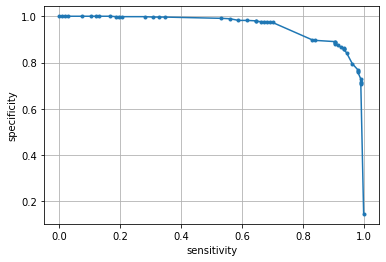

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

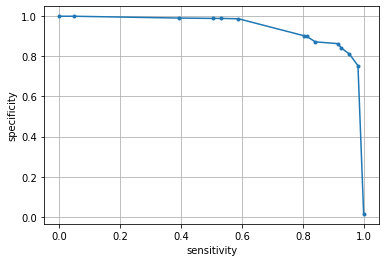

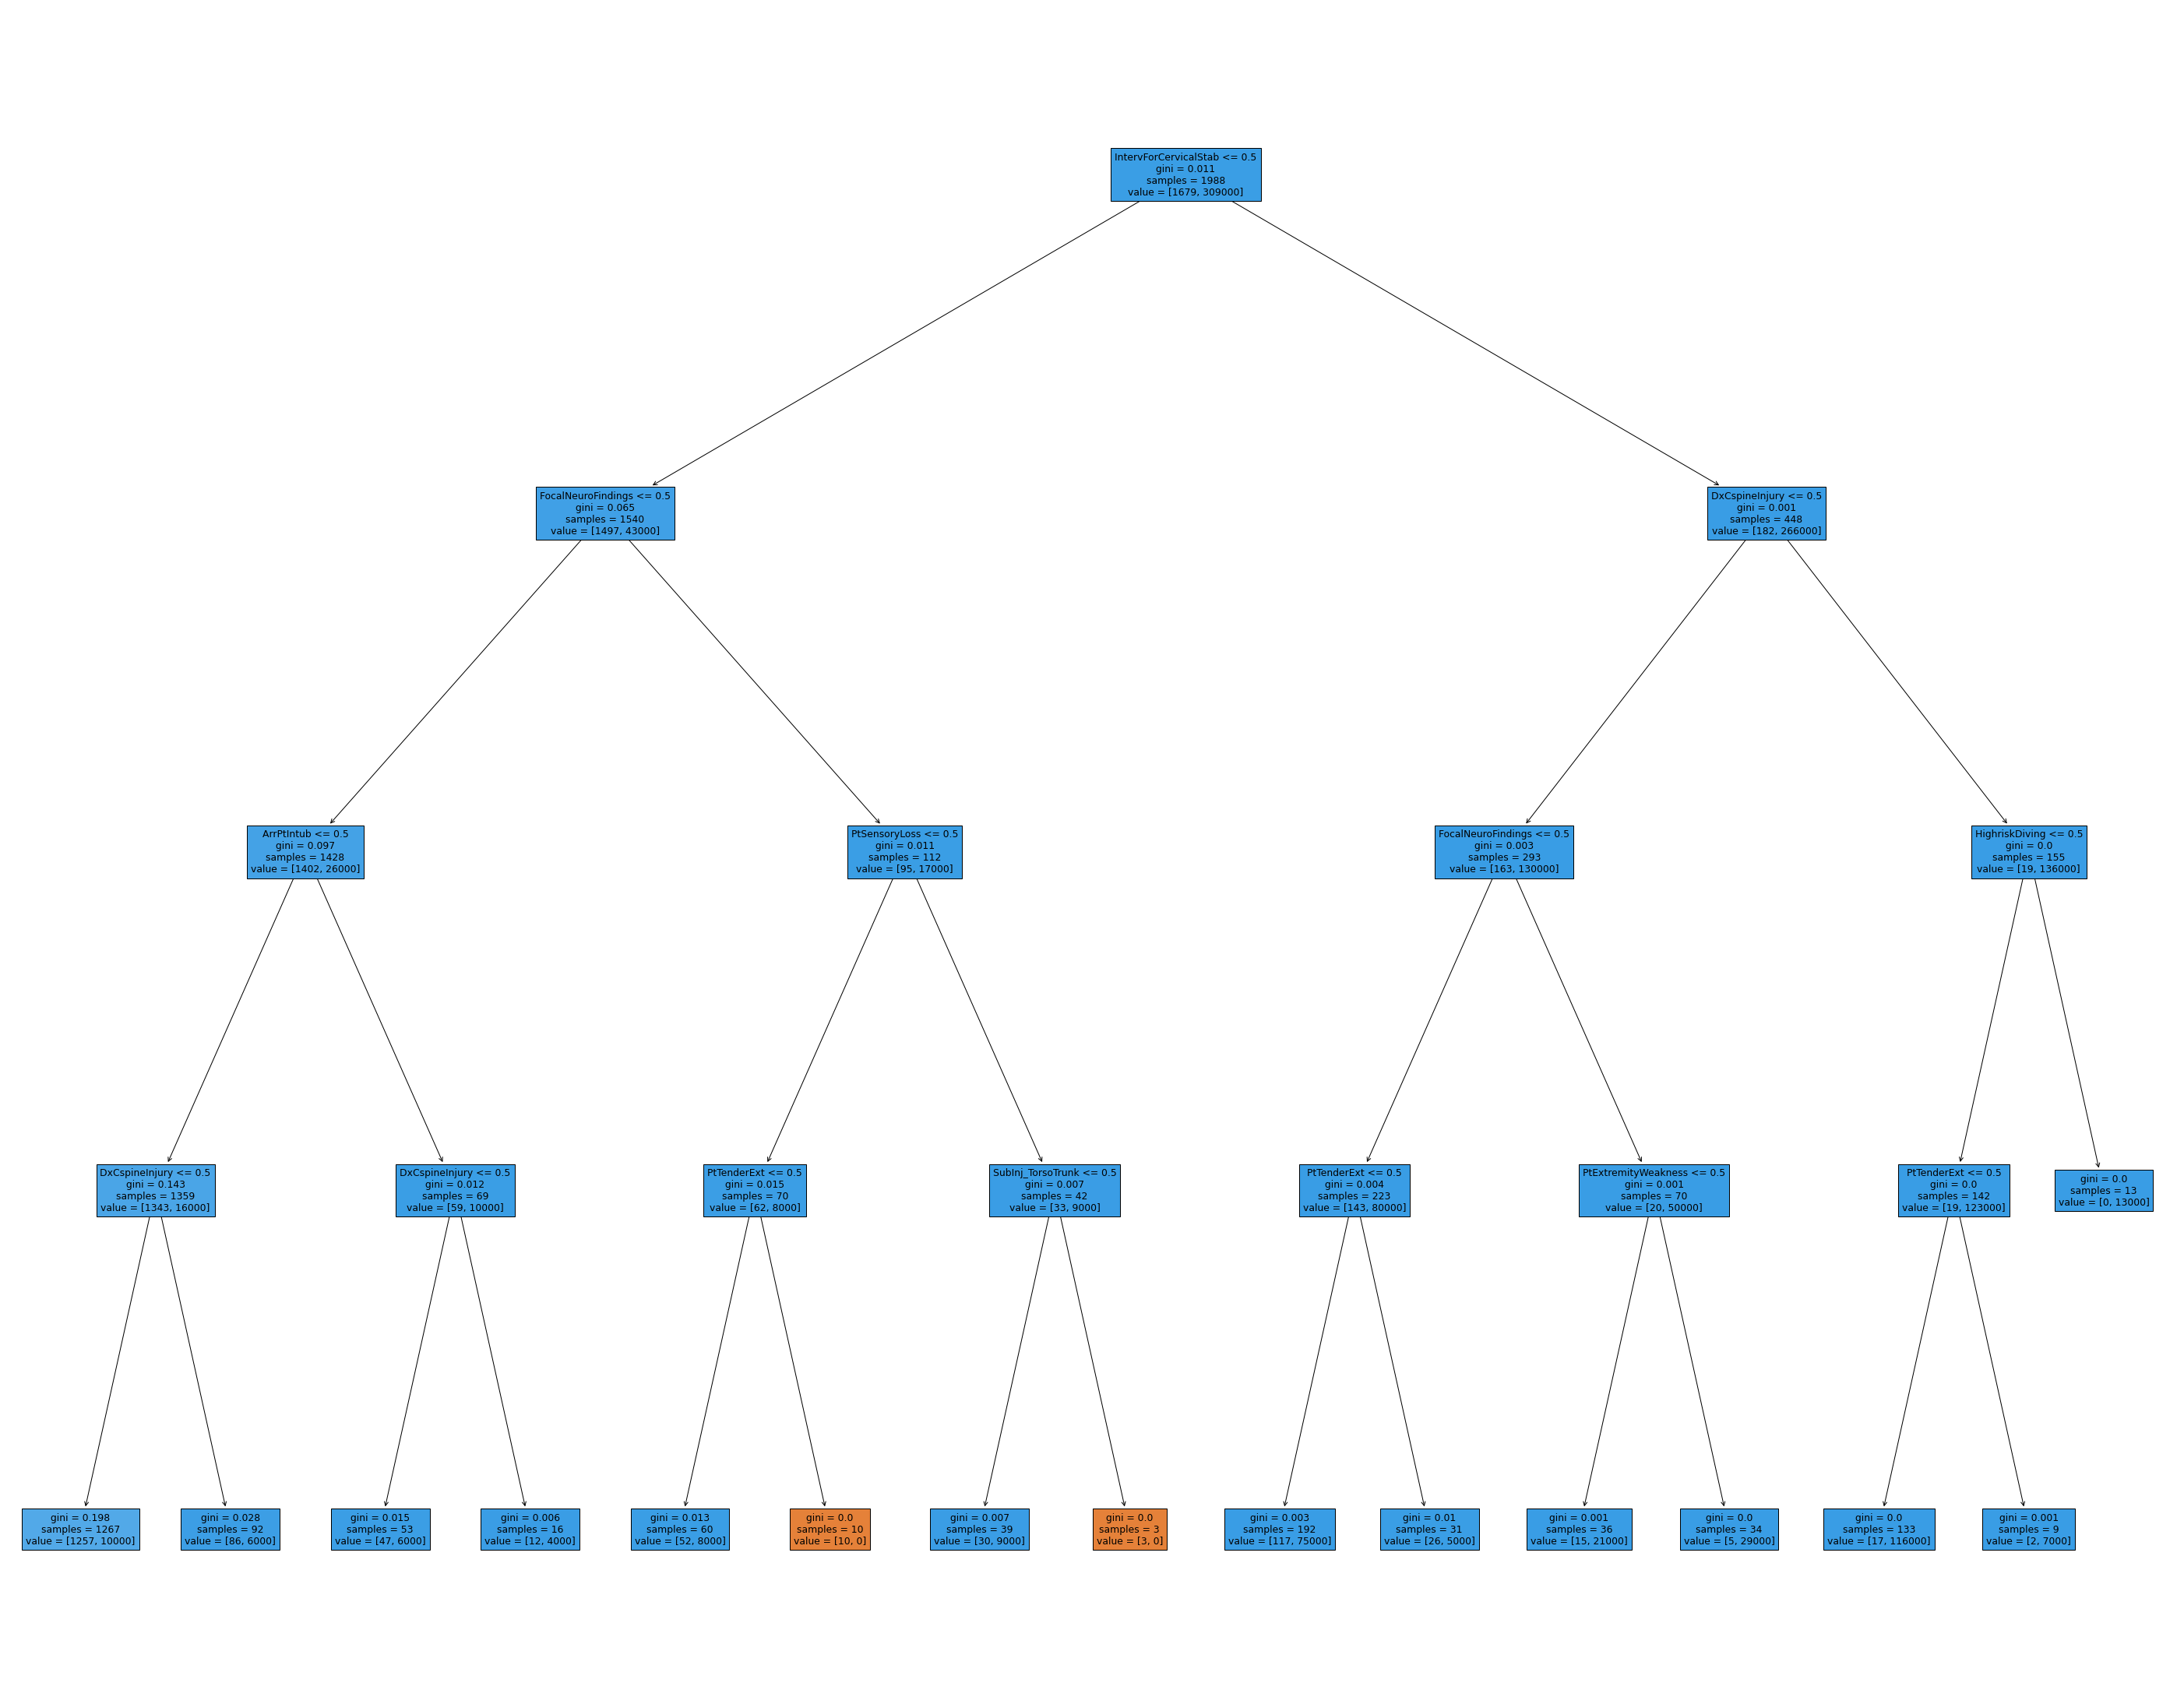

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

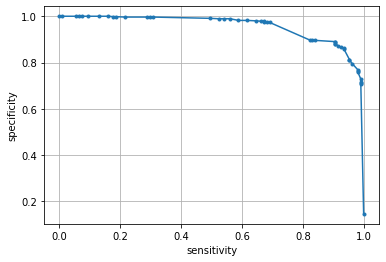

In [13]:
for mn in ml:
    print(mn)
    stats, threshes, plot, model = fit_simple_models(mn, X_train, X_tune, y_train, y_tune, feature_names, MODELS_DIR)
    # stats, threshes, model = fit_simple_models(mn, X_train, X_tune, y_train, y_tune, feature_names)
    result[mn]["stats"] = stats
    result[mn]["threshes"] = threshes
    result[mn]["plot"] = plot
    result[mn]["model"] = model

In [14]:
# result['decision_tree']['plot']
# result['decision_tree']['stats']

## fit other models

In [15]:
ml_oth = ['bayesian_rule_list', 'rulefit', 'grl']
result_oth = {mn : {'stats': {}, 'threshes': {}, 'plot': plt.figure(), "model": 0} for mn in ml_oth}

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 59.3% (54.8%-63.8%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 15.8% (9.7%-23.0%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 10.0% (5.1%-16.2%)
ELSE probability of IwI: 1.3% (0.8%-2.0%)



100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1158.41it/s]

rulefit


                                                                           rule  \
9                         IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   
10  ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   

    coef  
9  -0.01  
10 -0.02  


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 892.03it/s]
/Users/andyshen/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Desktop - Andy’s MacBook Pro/UC Berkeley/STAT 215A/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/andyshen/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Desktop - Andy’s MacBook Pro/UC Berkeley/STAT 215A/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.155 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.594 (448 pts)
mean 0.028 (1540 pts)
if feat 2 >= 1.0 then 0.152 (112 pts)
mean 0.018 (1428 pts)
if feat 0 >= 1.0 then 0.145 (69 pts)
mean 0.012 (1359 pts)
if feat 1 >= 1.0 then 0.065 (92 pts)
mean 0.008 (1267 pts)
if feat 8 >= 1.0 then 0.047 (43 pts)
mean 0.007 (1224 pts)
if feat 3 >= 1.0 then 0.007 (1219 pts)
mean 0 (5 pts)



100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1074.87it/s]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

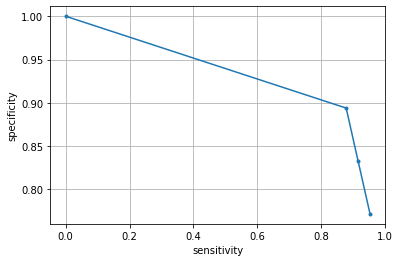

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

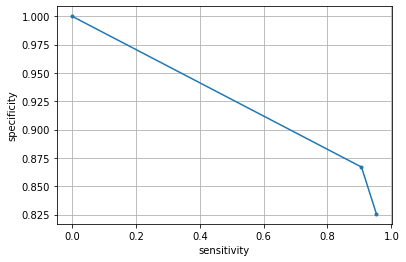

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

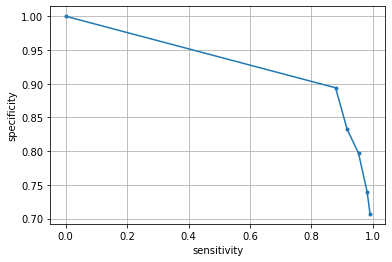

In [16]:
for mn in ml_oth:
    print(mn)
    stats, threshes, plot, model = fit_other_models(mn, X_train, X_tune, y_train, y_tune, feature_names, MODELS_DIR, seed_ = 123, verbose = True)
    result_oth[mn]["stats"] = stats
    result_oth[mn]["threshes"] = threshes
    result_oth[mn]["plot"] = plot
    result_oth[mn]["model"] = model

# look at all the results

In [17]:
suffixes = ['_train', '_tune']
titles = ['Train (PECARN)', 'Tune (PECARN)']

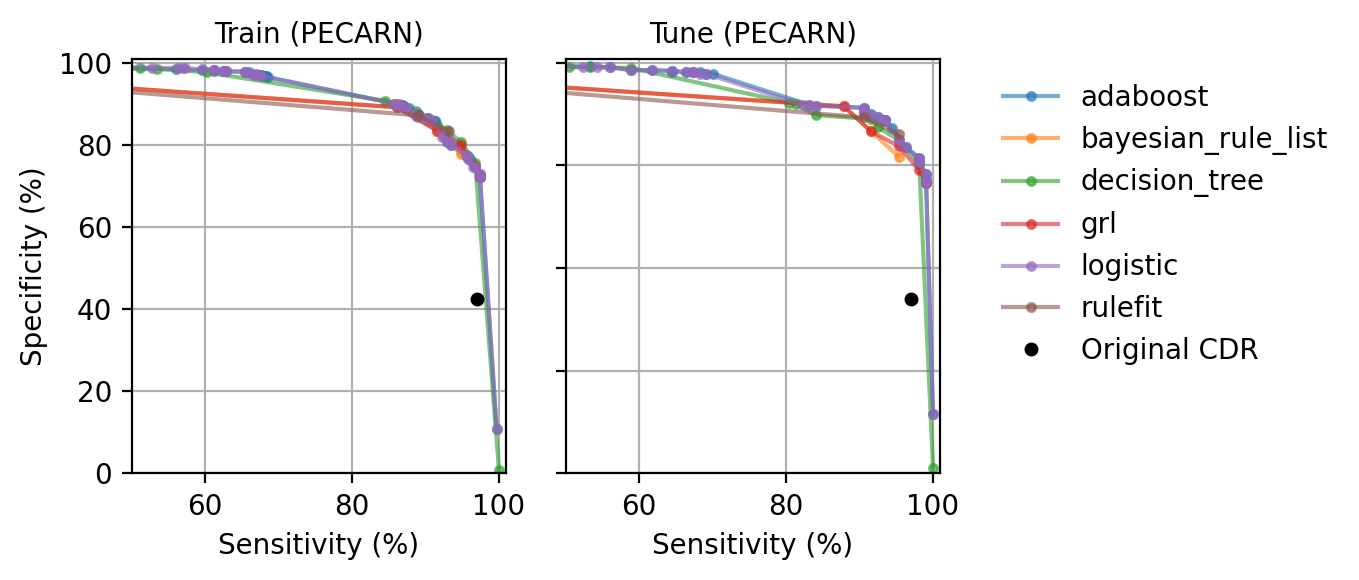

In [18]:
R, C = 1, len(suffixes)
plt.figure(dpi=200, figsize=(C * 2.5, R * 3), facecolor='w')
fs = 10
for i, suffix in enumerate(suffixes):
    ax = plt.subplot(R, C, i + 1)
    plot_metrics(suffix, MODELS_DIR, title=titles[i], fs=fs)
    if i > 0:
        plt.ylabel('')
        plt.yticks([0, 25, 50, 75, 100], labels=[''] * 5)
    #         ax.yaxis.set_visible(False)
    plt.xlim((50, 101))
    plt.ylim((0, 101))
plt.tight_layout()
# plt.subplot(R, C, 1)
# plt.legend(fontsize=20)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=fs, frameon=False)
#plt.savefig('figs/metrics_3_splits')
plt.show()


 _train
adaboost.pkl


100%|█████████████████████████████████████████| 74/74 [00:00<00:00, 2318.58it/s]


bayesian_rule_list.pkl


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1927.53it/s]


decision_tree.pkl


100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 2589.76it/s]


grl.pkl


100%|███████████████████████████████████████████| 7/7 [00:00<00:00, 1968.10it/s]


logistic.pkl


100%|█████████████████████████████████████████| 74/74 [00:00<00:00, 2925.45it/s]


rulefit.pkl


100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 2340.72it/s]



 _tune
adaboost.pkl


100%|█████████████████████████████████████████| 48/48 [00:00<00:00, 3678.95it/s]


bayesian_rule_list.pkl


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1725.70it/s]

decision_tree.pkl



100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 2609.91it/s]


grl.pkl


100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1695.47it/s]


logistic.pkl


100%|█████████████████████████████████████████| 48/48 [00:00<00:00, 3598.52it/s]


rulefit.pkl


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 2386.86it/s]


<Figure size 432x288 with 0 Axes>

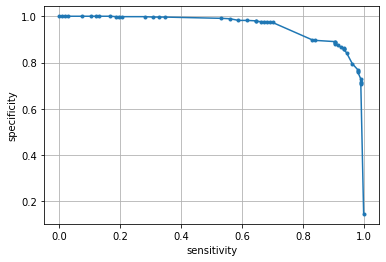

<Figure size 432x288 with 0 Axes>

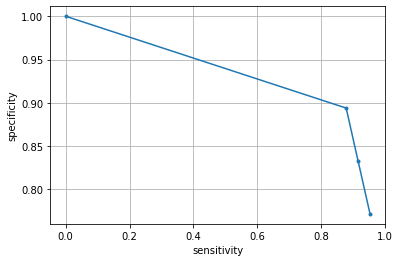

<Figure size 432x288 with 0 Axes>

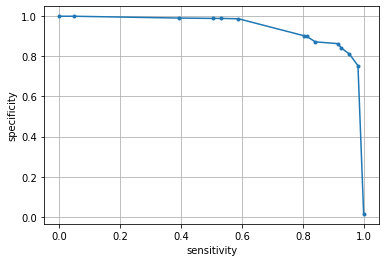

<Figure size 432x288 with 0 Axes>

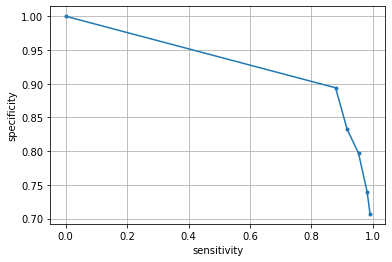

<Figure size 432x288 with 0 Axes>

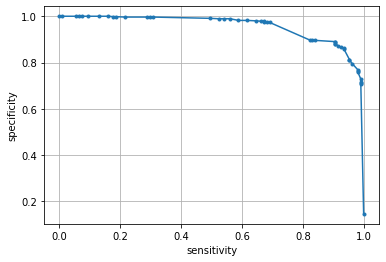

<Figure size 432x288 with 0 Axes>

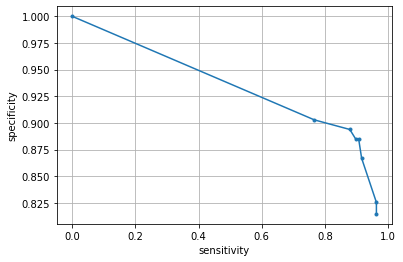

In [14]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    print("\n", suffix)
    stats_list[suffix] = print_metrics(suffix, X_train, X_tune, y_train, y_tune,MODELS_DIR)

In [15]:
stats_list['_train']

,adaboost,bayesian_rule_list,decision_tree,grl,logistic,rulefit
sens,0.97,0.95,0.97,0.97,0.97,0.94
spec,0.73,0.78,0.76,0.72,0.73,0.82
ppv,0.40,0.44,0.42,0.39,0.40,0.49
npv,0.99,0.99,0.99,0.99,0.99,0.99
lr+,3.59,4.25,3.97,3.53,3.59,5.13
lr-,0.04,0.07,0.04,0.04,0.04,0.07
brier_score,0.24,0.07,0.70,0.07,0.06,0.15
f1,0.57,0.60,0.59,0.56,0.57,0.64


In [16]:
stats_list['_tune']

,adaboost,bayesian_rule_list,decision_tree,grl,logistic,rulefit
sens,0.99,0.95,0.98,0.99,0.99,0.96
spec,0.73,0.77,0.75,0.71,0.73,0.83
ppv,0.41,0.45,0.43,0.39,0.41,0.52
npv,1.00,0.99,1.00,1.00,1.00,0.99
lr+,3.65,4.17,3.98,3.38,3.65,5.52
lr-,0.01,0.06,0.02,0.01,0.01,0.05
brier_score,0.24,0.07,0.69,0.07,0.06,0.15
f1,0.58,0.61,0.60,0.56,0.58,0.67
